# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

import matplotlib.pyplot as plt

%matplotlib inline

sns.set(color_codes=True)

#import Random Forest Classifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



---
## 2. Load data

In [2]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131           4.100838e-05   
1                   0.000003           1.217891e-03   
2                   0.000004           9.450150e-08   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0                   0.000908                   2.086294   
1                   0.000000                   0.009482   
2                   0.000000                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix var_6m_price_off_peak  \
0              99.530517                  44.235794              2.086425   
1               0.000000                   0.000000              0.009485   
2               0.000000                   0.000000              0.000004   

   var_6m_price_peak  var_6m_price_mid_peak  churn  
0       9.953056e+01              44.236702      1  
1       1.217891e-03               0.000000      0  
2       9.450150e-08               0.000000      0  

[3 rows x 44 columns]

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('./price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()



# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()




# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')


diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head(10)

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   
5  00126c87cf78d7604278f0a9adeb689e                        -0.012908   
6  0013f326a839a2f6ad87a1859952d227                        -0.006171   
7  00184e957277eeef733a7b563fdabd06                        -0.004111   
8  001987ed9dbdab4efa274a9c7233e1f4                        -0.007801   
9  0019baf3ed1242cd99b3cb592030446f                         0.118869   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001  
5                        0.162916  
6                        0.000000  
7                       -0.000001  
8                        0.162916  
9                       14.939999

Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

In [6]:
# Merging the diff and df dataframes
df = pd.merge(df, diff, on='id')

df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0               9.084737e-04                   2.086294   
1               0.000000e+00                   0.009482   
2               0.000000e+00                   0.000000   
3               0.000000e+00                   0.000000   
4               4.860000e-10                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix  var_6m_price_off_peak  \
0              99.530517                  44.235794               2.086425   
1               0.000000                   0.000000               0.009485   
2               0.000000                   0.000000               0.000004   
3               0.000000                   0.000000               0.000003   
4               0.000000                   0.000000               0.000011   

   var_6m_price_peak var_6m_price_mid_peak  churn  \
0       9.953056e+01          4.423670e+01      1   
1       1.217891e-03          0.000000e+00      0   
2       9.450150e-08          0.000000e+00      0   
3       0.000000e+00          0.000000e+00      0   
4       2.896760e-06          4.860000e-10      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                         0.020057                        3.700961  
1                        -0.003767                        0.177779  
2                        -0.004670                        0.177779  
3                        -0.004547                        0.177779  
4                        -0.006192                        0.162916  

[5 rows x 46 columns]

In [7]:

# We will calculate average prices per period by company


mean_prices = price_df.groupby(['id']).agg({
              'price_off_peak_var' : 'mean',
              'price_peak_var': 'mean',
              'price_mid_peak_var': 'mean',
              'price_off_peak_fix': 'mean',
              'price_peak_fix': 'mean',
              'price_mid_peak_fix': 'mean'
}).reset_index()




In [8]:
#Calculate mean difference between consecutive periods

mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']

mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']

mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']

mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_fix']

mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']

mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']


In [9]:


cols = [
    'id',
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff',
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff',
    'peak_mid_peak_fix_mean_diff',
    'off_peak_mid_peak_fix_mean_diff'
]


df = pd.merge(df, mean_prices[cols], on='id')

df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  var_6m_price_mid_peak  \
0      2015-11-01   2015-06-23               0.00  ...           4.423670e+01   
1      2009-08-21   2015-08-31             189.95  ...           0.000000e+00   
2      2010-04-16   2015-04-17              47.96  ...           0.000000e+00   
3      2010-03-30   2015-03-31             240.04  ...           0.000000e+00   
4      2010-01-13   2015-03-09             445.75  ...           4.860000e-10   

   churn  offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0      1                         0.020057                        3.700961   
1      0                        -0.003767                        0.177779   
2      0                        -0.004670                        0.177779   
3      0                        -0.004547                        0.177779   
4      0                        -0.006192                        0.162916   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   
2                     0.082090                     0.088421   
3                     0.151210                     0.000000   
4                     0.020536                     0.030773   

  off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                        0.058257                   -22.227223   
1                        0.149609                     0.149609   
2                        0.170512                     0.170512   
3                        0.151210                     0.151210   
4                        0.051309                   -24.288718   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                     7.450670                        26.040925  
1                     0.000000                        44.311375  
2                     0.000000                        44.385450  
3                     0.000000                        44.400265  
4                     8.137629                        24.412893  

[5 rows x 52 columns]

This feature enhances granularity compared to the existing one.  It examines mean average price differences across various time periods (off-peak, peak, mid-peak), rather than yearly. While the Dec-Jan feature uncovers yearly macro patterns, the inter-time-period features reveal monthly micro patterns.








#### Price Changes Across Months and Different Periods

In [10]:
#We are aggregating average prices per period by company

mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean',
}).reset_index()

In [11]:
#We are now calculating mean difference between periods that are consecutive


mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']

mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']

mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']

mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']

mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']




In [12]:
#Now we will calculate the max. monthly difference across different time periods


max_diff_periods_month = mean_prices_by_month.groupby(['id', 'price_date']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max',
}).reset_index().rename(
        columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [13]:
max_diff_periods_month

id price_date  \
0       0002203ffbb812588b632b9e628cc38d 2015-01-01   
1       0002203ffbb812588b632b9e628cc38d 2015-02-01   
2       0002203ffbb812588b632b9e628cc38d 2015-03-01   
3       0002203ffbb812588b632b9e628cc38d 2015-04-01   
4       0002203ffbb812588b632b9e628cc38d 2015-05-01   
...                                  ...        ...   
192997  ffff7fa066f1fb305ae285bb03bf325a 2015-08-01   
192998  ffff7fa066f1fb305ae285bb03bf325a 2015-09-01   
192999  ffff7fa066f1fb305ae285bb03bf325a 2015-10-01   
193000  ffff7fa066f1fb305ae285bb03bf325a 2015-11-01   
193001  ffff7fa066f1fb305ae285bb03bf325a 2015-12-01   

        off_peak_peak_var_max_monthly_diff  \
0                                 0.022123   
1                                 0.022123   
2                                 0.022225   
3                                 0.022225   
4                                 0.022225   
...                                    ...   
192997                            0.017684   
192998                            0.017684   
192999                            0.017684   
193000                            0.017684   
193001                            0.017684   

        peak_mid_peak_var_max_monthly_diff  \
0                                 0.033743   
1                                 0.033743   
2                                 0.032069   
3                                 0.032069   
4                                 0.032069   
...                                    ...   
192997                            0.025975   
192998                            0.025975   
192999                            0.025975   
193000                            0.025975   
193001                            0.025975   

        off_peak_mid_peak_var_max_monthly_diff  \
0                                     0.055866   
1                                     0.055866   
2                                     0.054294   
3                                     0.054294   
4                                     0.054294   
...                                        ...   
192997                                0.043659   
192998                                0.043659   
192999                                0.043659   
193000                                0.043659   
193001                                0.043659   

        off_peak_peak_fix_max_monthly_diff  \
0                                16.226389   
1                                16.226389   
2                                16.291555   
3                                16.291555   
4                                16.291555   
...                                    ...   
192997                           16.291555   
192998                           16.291555   
192999                           16.291555   
193000                           16.291555   
193001                           16.291555   

        peak_mid_peak_fix_max_monthly_diff  \
0                                 8.113192   
1                                 8.113192   
2                                 8.145775   
3                                 8.145775   
4                                 8.145775   
...                                    ...   
192997                            8.145775   
192998                            8.145775   
192999                            8.145775   
193000                            8.145775   
193001                            8.145775   

        off_peak_mid_peak_fix_max_monthly_diff  
0                                    24.339581  
1                                    24.339581  
2                                    24.437330  
3                                    24.437330  
4                                    24.437330  
...                                        ...  
192997                               24.437330  
192998                               24.437330  
192999                               24.437330  
193000                               24.437330  
193001                   

In [14]:
# We will select the pertinent columns and merge them with our existing data frame for futher exploration

columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_periods_month[columns], on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1         0         54946                0 2013-06-15 2016-06-15   
2         0         54946                0 2013-06-15 2016-06-15   
3         0         54946                0 2013-06-15 2016-06-15   
4         0         54946                0 2013-06-15 2016-06-15   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23                0.0  ...   
1      2015-11-01   2015-06-23                0.0  ...   
2      2015-11-01   2015-06-23                0.0  ...   
3      2015-11-01   2015-06-23                0.0  ...   
4      2015-11-01   2015-06-23                0.0  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                   -22.227223   
1                         0.058257                   -22.227223   
2                         0.058257                   -22.227223   
3                         0.058257                   -22.227223   
4                         0.058257                   -22.227223   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                      7.45067                        26.040925   
1                      7.45067                        26.040925   
2                      7.45067                        26.040925   
3                      7.45067                        26.040925   
4                      7.45067                        26.040925   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.022581                            0.031859   
1                            0.022581                            0.031859   
2                            0.022581                            0.031859   
3                            0.022581                            0.031859   
4                            0.022581                            0.031859   

  off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                                0.05444                           16.226389   
1                                0.05444                           16.226389   
2                                0.05444                           16.226395   
3                                0.05444                           16.226395   
4                                0.05444                           16.226395   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            8.113192                               24.339581  
1                            8.113192                               24.339581  
2                            8.113195                               24.339590  
3                            8.113195                               24.339590  
4                            8.113195                               24.339590  

[5 rows x 58 columns]

In [15]:
#Creating a Tenure Column

df['tenure'] = ((df['date_end'] - df['date_activ'])/np.timedelta64(1, 'Y')).astype(int)

df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
3       0.143612
2       0.132656
4       0.125711
13      0.095238
5       0.085298
12      0.083333
6       0.080687
7       0.073354
11      0.063584
8       0.048064
9       0.024096
10      0.020033

In [16]:
#Transform the dates into months.

reference_date = datetime(2016, 1, 1)

# Calculate the months directly within the DataFrame operations

#Number of months active until reference date (Jan 2016
df['months_activ'] = ((reference_date - df['date_activ']) / np.timedelta64(1, 'M')).astype(int)

#Number of months of the contract left until reference date (Jan 2016)
df['months_to_end'] = -((reference_date - df['date_end']) / np.timedelta64(1, 'M')).astype(int)

#Number of months since last modification until reference date (Jan 2016)
df['months_modif_prod'] = ((reference_date - df['date_modif_prod']) / np.timedelta64(1, 'M')).astype(int)

#Number of months since last renewal until reference date (Jan 2016)
df['months_renewal'] = ((reference_date - df['date_renewal']) / np.timedelta64(1, 'M')).astype(int)







In [17]:
#Remove the datatime columns. Since it will affect the feature engineering


remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

df = df.drop(columns=remove)

df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0                0.0   
1         0         54946                0                0.0   
2         0         54946                0                0.0   
3         0         54946                0                0.0   
4         0         54946                0                0.0   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                     1.78   
2                   0                       0.0                     1.78   
3                   0                       0.0                     1.78   
4                   0                       0.0                     1.78   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_max_monthly_diff  \
0                        0.114481  ...                            0.031859   
1                        0.114481  ...                            0.031859   
2                        0.114481  ...                            0.031859   
3                        0.114481  ...                            0.031859   
4                        0.114481  ...                            0.031859   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                 0.05444                          16.226389   
1                                 0.05444                          16.226389   
2                                 0.05444                          16.226395   
3                                 0.05444                          16.226395   
4                                 0.05444                          16.226395   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                            8.113192                               24.339581   
1                            8.113192                               24.339581   
2                            8.113195                               24.339590   
3                            8.113195                               24.339590   
4                            8.113195                               24.339590   

   tenure  months_activ  months_to_end  months_modif_prod months_renewal  
0       3            30              5                  2              6  
1       3            30              5                  2              6  
2       3            30              5                  2              6  
3       3            30              5                  2              6  
4       3            30              5                  2              6  

[5 rows x 59 columns]

###Transforming boolean data (has_gas)

In [18]:
#REp
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1,0])

df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100437
1        0.081925

From this statistic, we observe that PowerCo. customers who have gas are 2% less likely to churn than customers who do not have gas.

Categorical Data Transformation

Channel Sales

In [19]:
# Transform channel sales to type categorical


df['channel_sales'] = df['channel_sales'].astype('category')

df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    80971
MISSING                             44684
lmkebamcaaclubfxadlmueccxoimlema    22105
usilxuppasemubllopkaafesmlibmsdf    16486
ewpakwlliwisiwduibdlfmalxowmwpci    10712
sddiedcslfslkckwlfkdpoeeailfpeds      131
epumfxlbckeskwekxbiuasklxalciiuu       36
fixdbufsefwooaasfcxdxadsiekoceaa       24
Name: channel_sales, dtype: int64

Relative to the other values, the last three appear to be negligible in amount, so we weill drop them accordingly          

In [20]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')

df = df.drop(columns =['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])

df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
2  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
3  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
4  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0                0.0                   0                       0.0   
1                0.0                   0                       0.0   
2                0.0                   0                       0.0   
3                0.0                   0                       0.0   
4                0.0                   0                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                     1.78                        0.114481   
2                     1.78                        0.114481   
3                     1.78                        0.114481   
4                     1.78                        0.114481   

   forecast_price_energy_peak  ...  tenure  months_activ  months_to_end  \
0                    0.098142  ...       3            30              5   
1                    0.098142  ...       3            30              5   
2                    0.098142  ...       3            30              5   
3                    0.098142  ...       3            30              5   
4                    0.098142  ...       3            30              5   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  2               6                0   
1                  2               6                0   
2                  2               6                0   
3                  2               6                0   
4                  2               6                0   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         1   
2                                         1   
3                                         1   
4                                         1   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 63 columns]

## Origin_up

In [21]:
# Transform channel sales to type categorical


df['origin_up'] = df['origin_up'].astype('category')

df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    85086
kamkkxfxxuwbdslkwifmmcsiusiuosws    51503
ldkssxwpmemidmecebumciepifcamkci    37757
MISSING                               767
usapbepcfoloekilkwsdiboslwaxobdp       24
ewxeelcelemmiwuafmddpobolfuxioce       12
Name: origin_up, dtype: int64

In [22]:
#Remove the last 3 categories since they have very low frequency compared

df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')

df = df.drop(columns =['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])

df.head()


id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
2  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
3  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
4  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0                0.0                   0                       0.0   
1                0.0                   0                       0.0   
2                0.0                   0                       0.0   
3                0.0                   0                       0.0   
4                0.0                   0                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                     1.78                        0.114481   
2                     1.78                        0.114481   
3                     1.78                        0.114481   
4                     1.78                        0.114481   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...                  2               6   
1                    0.098142  ...                  2               6   
2                    0.098142  ...                  2               6   
3                    0.098142  ...                  2               6   
4                    0.098142  ...                  2               6   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                0                                         0   
2                0                                         0   
3                0                                         0   
4                0                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         1   
2                                         1   
3                                         1   
4                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           1  

[5 rows x 65 columns]


In our last session, I noticed that some of our data was pretty skewed. It's pretty important to tackle this because the models I'm using, the parametric ones, kind of expect the data to behave a certain way - like being normally distributed.

I've always found that skewness can be a bit tricky. It's not necessarily a problem all the time, but I prefer to straighten things out, especially since it helps the models work better and faster.

So, what I'm thinking is we could transform these skewed numbers. There are a few ways to do it, like using square roots, cubic roots, or logarithms. This time, I'm leaning towards logarithms for the data that's leaning too much to one side. Just a heads up, I can't use logs directly on zeroes, so I'll add a tiny bit, like 1, to those numbers first.

Before I jump into transforming everything, I want to take a quick look at the stats for these skewed features. It'll be good to see how they change after I work my magic on them.







### Numerical Data Transormation

In [23]:
skewed = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]


df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.751490e+05  1.751490e+05    175149.000000      175149.000000   
mean   1.592606e+05  2.808072e+04     16095.518404        1868.343884   
std    5.735413e+05  1.629400e+05     64376.741908        2387.560169   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674000e+03  0.000000e+00         0.000000         494.980000   
50%    1.411500e+04  0.000000e+00       792.000000        1112.610000   
75%    4.076300e+04  0.000000e+00      3383.000000        2400.350000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count       175149.000000             175149.000000            175149.000000   
mean          1399.782380                  0.967028                63.074649   
std           3248.331276                  5.109025                66.143996   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.790000   
75%           1745.000000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                   175149.000000               175149.000000   
mean                         0.137287                    0.050487   
std                          0.024625                    0.049036   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                175149.000000  
mean                     43.130229  
std                       4.486779  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

The standard deviations for these columns(features) are pretty high

In [24]:


df['cons_12m'] = np.log10(df['cons_12m'] + 1)
df['cons_gas_12m'] = np.log10(df['cons_gas_12m']+1)

df['cons_last_month'] = np.log10(df['cons_last_month']+1)

df['forecast_cons_year'] = np.log10(df['forecast_cons_year'] + 1)

df['forecast_cons_12m'] = np.log10(df['forecast_cons_12m'] + 1)
df['forecast_meter_rent_12m'] = np.log10(df['forecast_meter_rent_12m'] + 1)


df['imp_cons'] = np.log10(df['imp_cons']+ 1)


In [25]:

#Check the distribution of transformed-log features
df[skewed].describe()

cons_12m   cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  175149.000000  175149.000000    175149.000000      175149.000000   
mean        4.223974       0.779107         2.264762           2.962138   
std         0.884530       1.716895         1.769263           0.683576   
min         0.000000       0.000000         0.000000           0.000000   
25%         3.753966       0.000000         0.000000           2.695464   
50%         4.149712       0.000000         2.899273           3.046733   
75%         4.610277       0.000000         3.529430           3.380455   
max         6.792889       6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count       175149.000000             175149.000000            175149.000000   
mean             1.784528                  0.967028                 1.517148   
std              1.584941                  5.109025                 0.571421   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296446   
75%              3.242044                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                   175149.000000               175149.000000   
mean                         0.137287                    0.050487   
std                          0.024625                    0.049036   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                175149.000000  
mean                     43.130229  
std                       4.486779  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

<ipython-input-26-f5098f58b3e4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
<ipython-input-26-f5098f58b3e4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
<ipython-input-26-f5098f58b3e4>:6: U

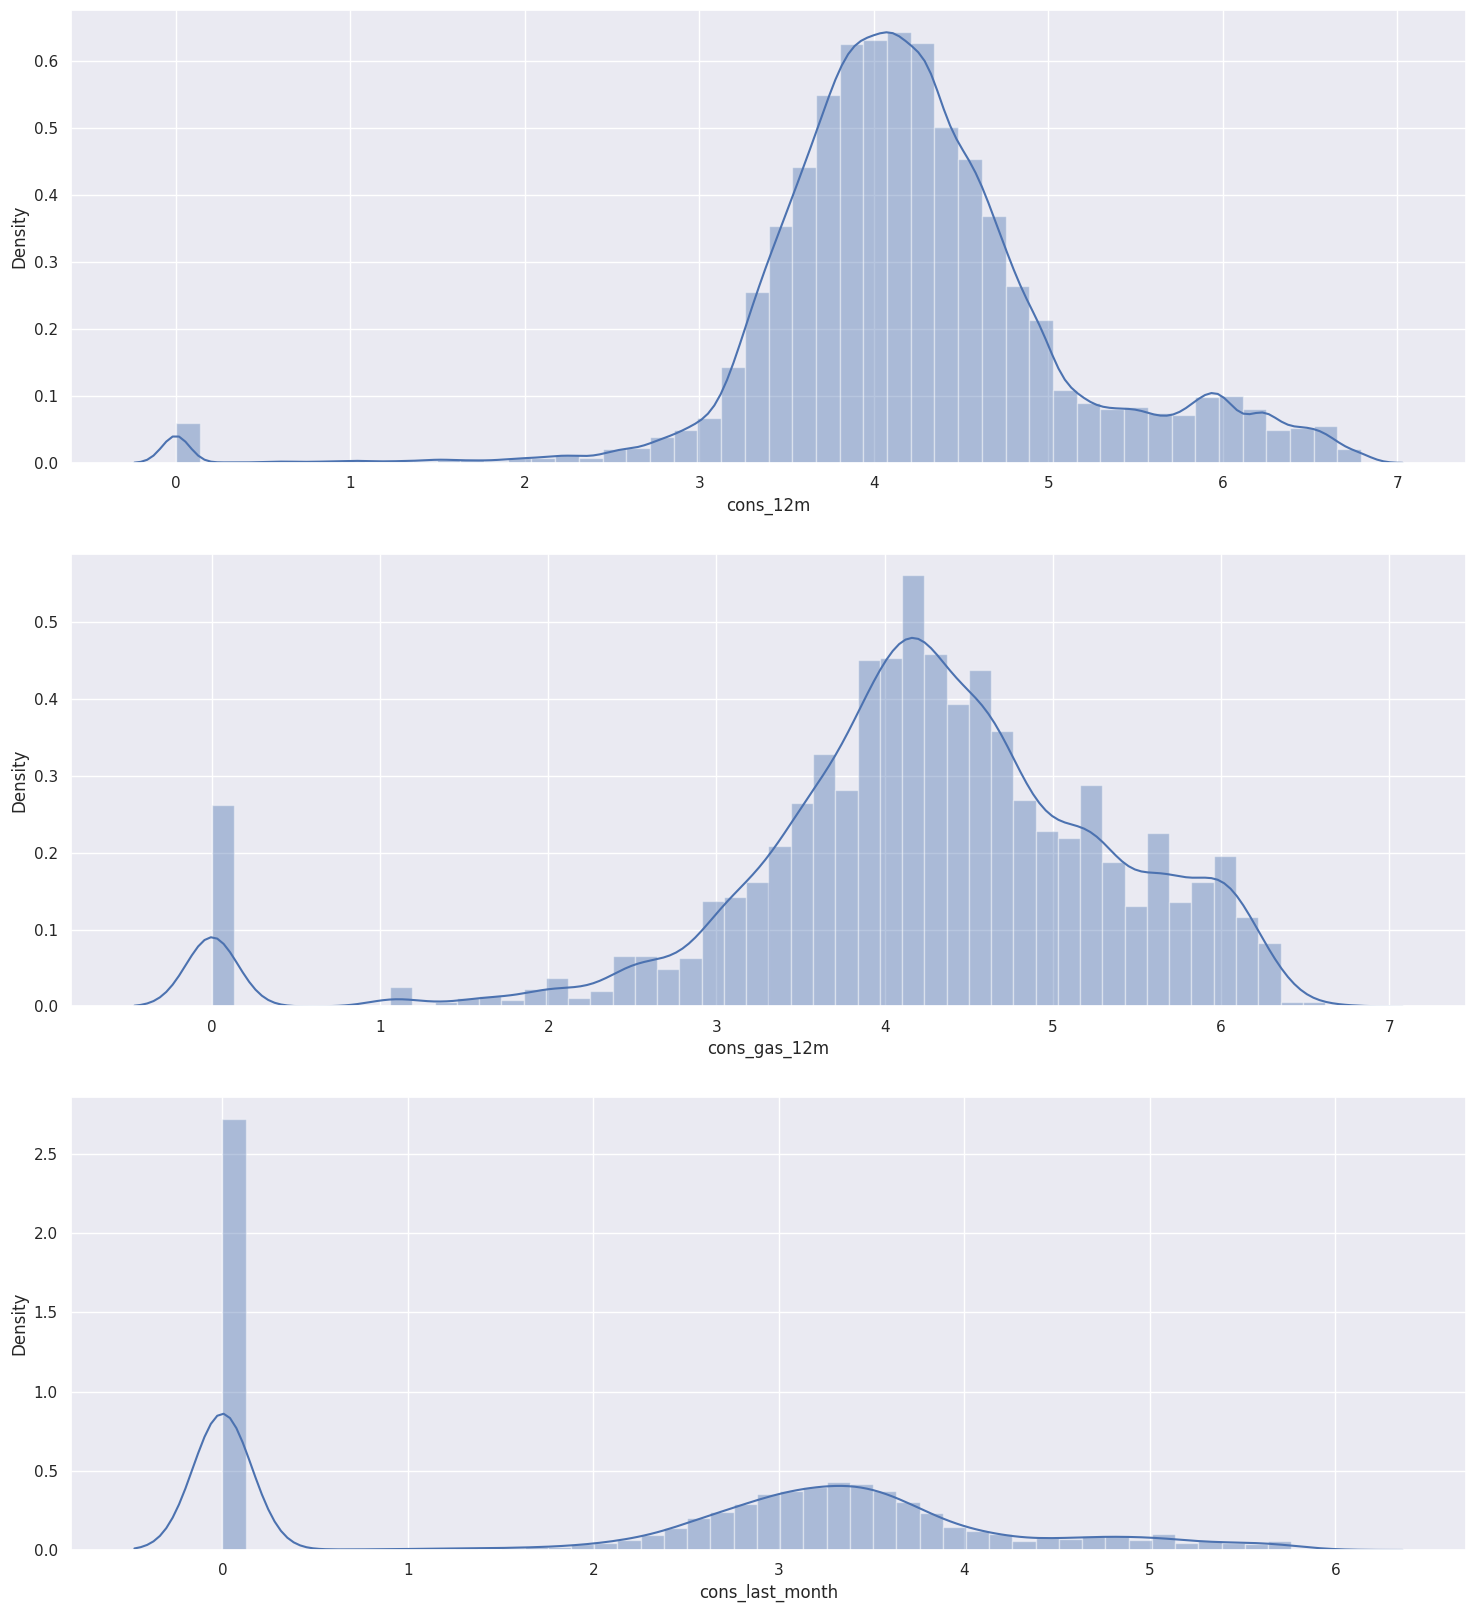

In [26]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))

# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()


<ipython-input-27-26d950d5530b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


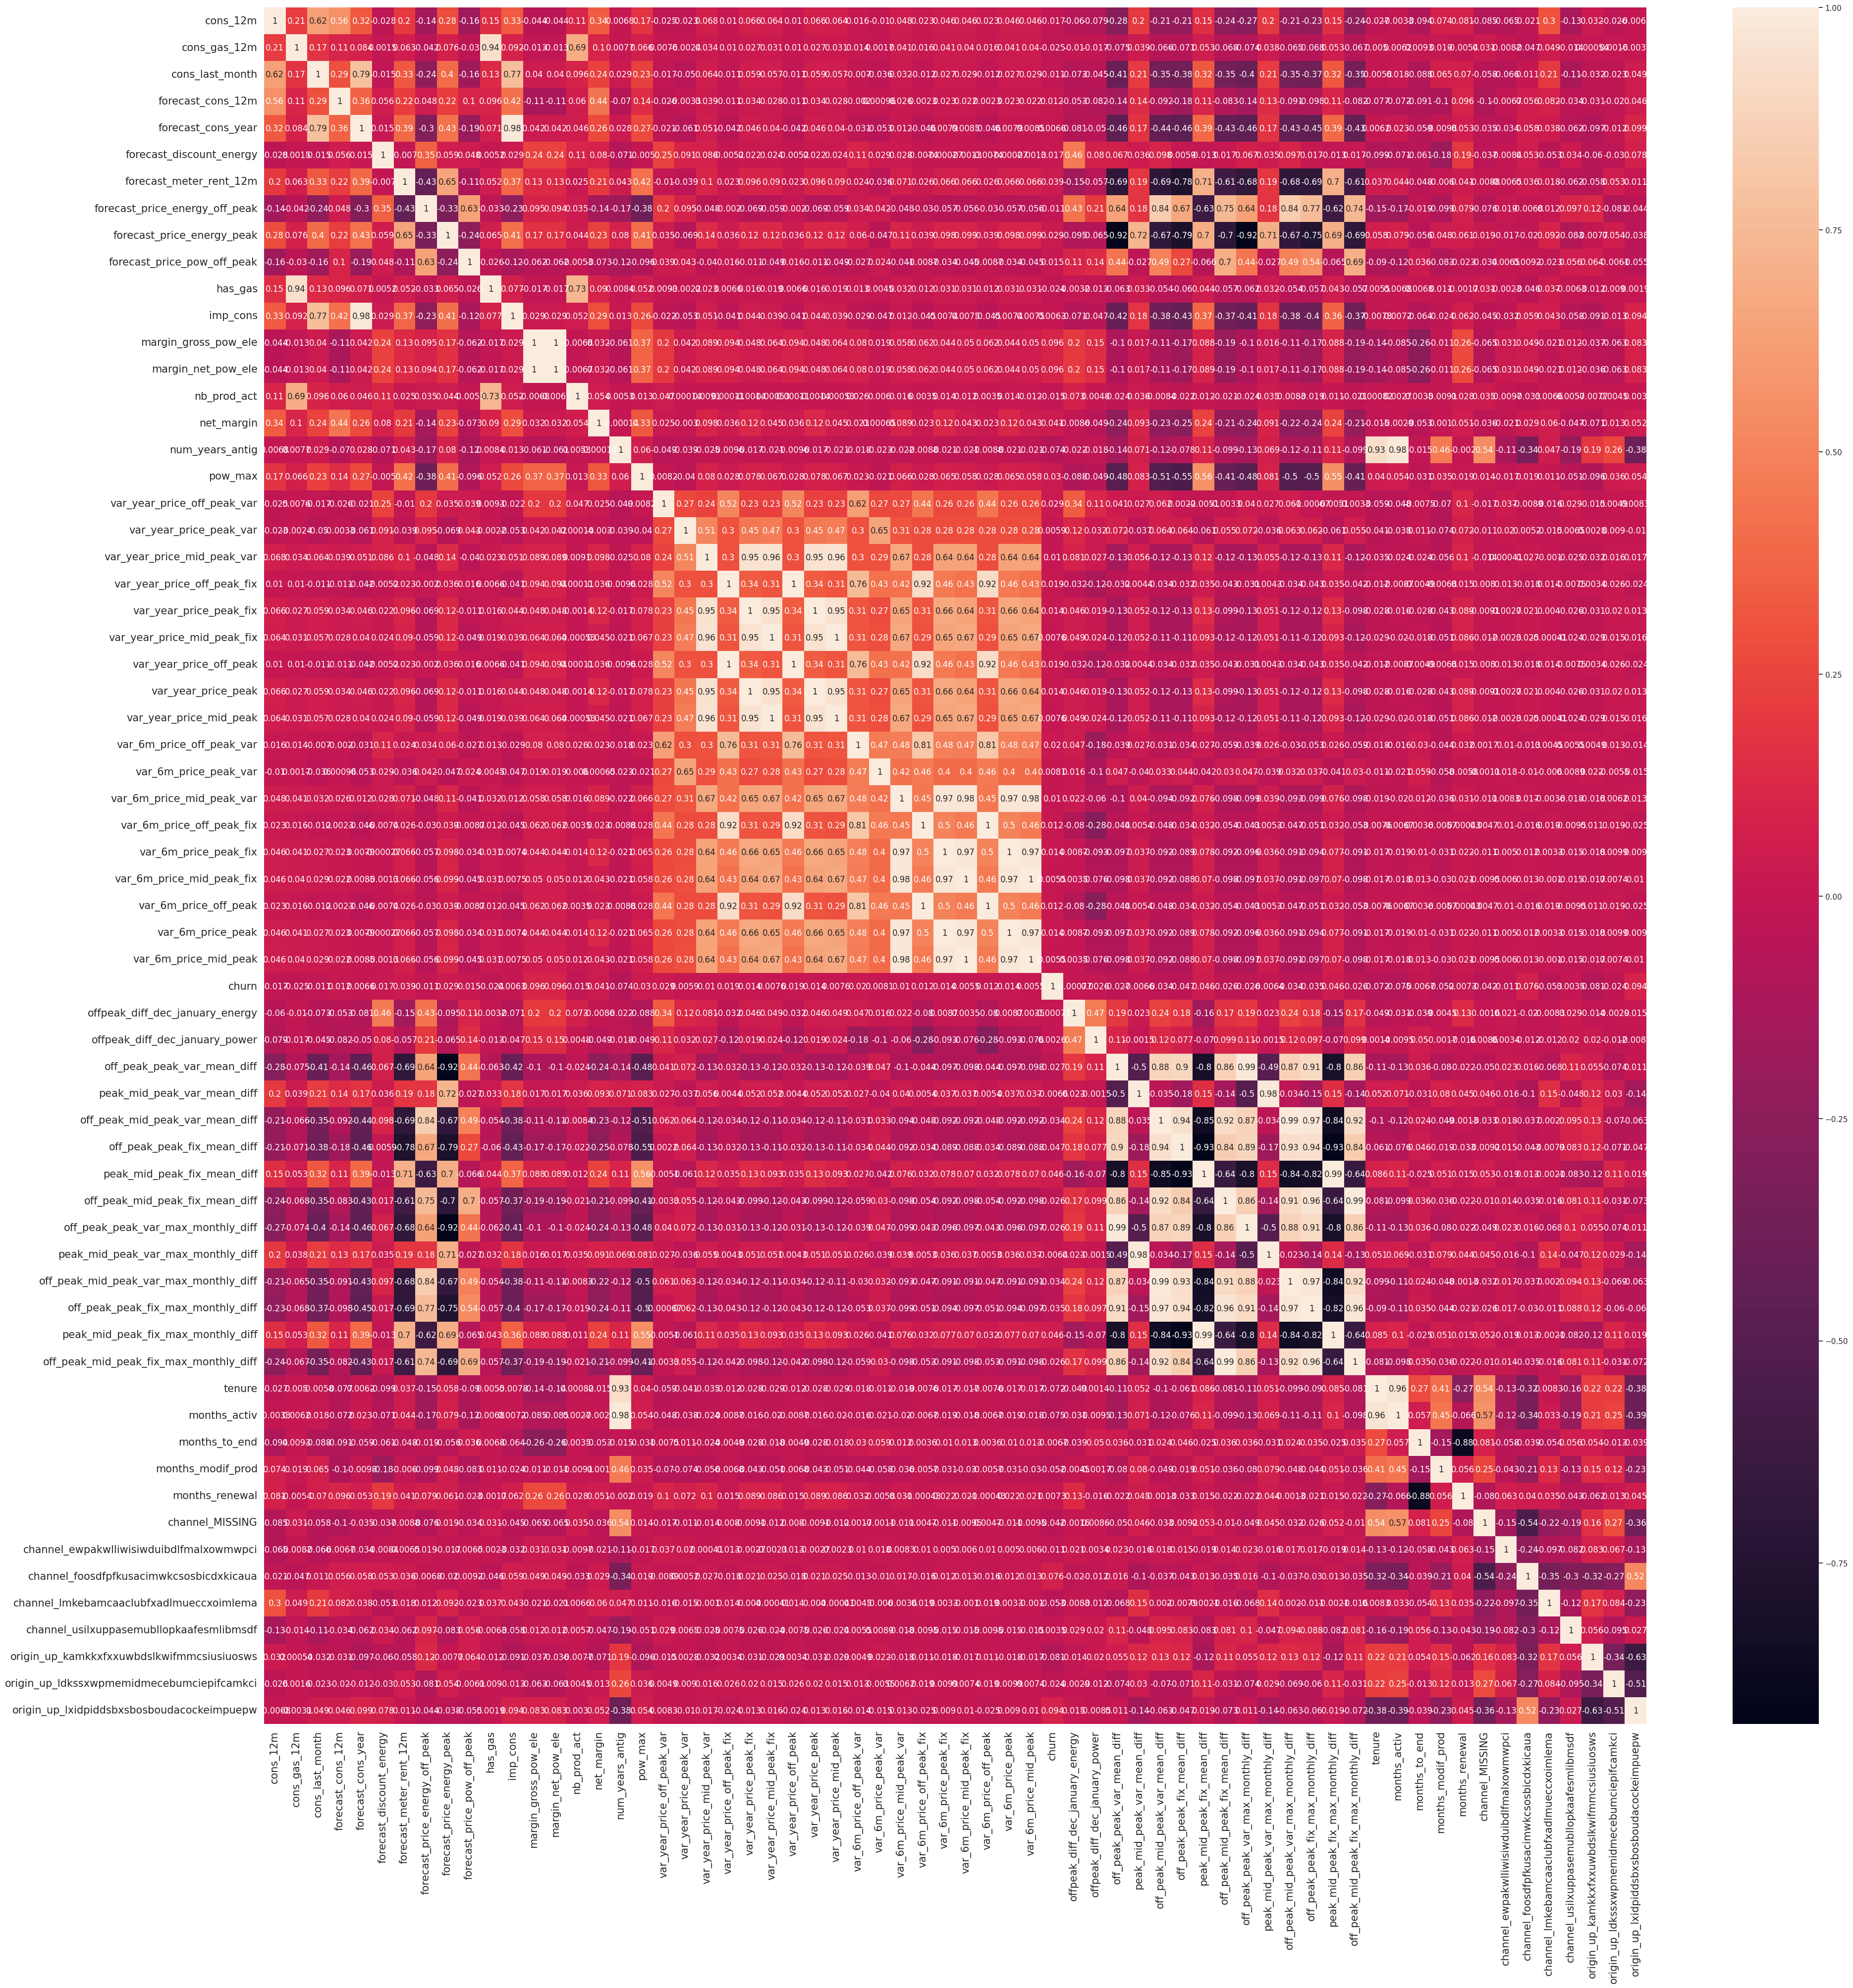

In [27]:
#Now we will create a correlation matrix

correlation_matrix = df.corr()


plt.figure(figsize = (45, 45))

sns.heatmap(
      correlation_matrix,
      xticklabels=correlation_matrix.columns.values,
      yticklabels=correlation_matrix.columns.values,
      annot=True,
      annot_kws={'size': 12}
)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [28]:
# Remove highly correlated independent variables: Num Years Antig and Forecast Cons Year


df = df.drop(columns = ['num_years_antig', 'forecast_cons_year'])

df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57       0.0      4.739944              0.0   
1  24011ae4ebbe3035111d65fa7c15bc57       0.0      4.739944              0.0   
2  24011ae4ebbe3035111d65fa7c15bc57       0.0      4.739944              0.0   
3  24011ae4ebbe3035111d65fa7c15bc57       0.0      4.739944              0.0   
4  24011ae4ebbe3035111d65fa7c15bc57       0.0      4.739944              0.0   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0                0.0                       0.0                 0.444045   
1                0.0                       0.0                 0.444045   
2                0.0                       0.0                 0.444045   
3                0.0                       0.0                 0.444045   
4                0.0                       0.0                 0.444045   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.114481                    0.098142   
2                        0.114481                    0.098142   
3                        0.114481                    0.098142   
4                        0.114481                    0.098142   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal  \
0                    40.606701  ...                  2               6   
1                    40.606701  ...                  2               6   
2                    40.606701  ...                  2               6   
3                    40.606701  ...                  2               6   
4                    40.606701  ...                  2               6   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                0                                         0   
2                0                                         0   
3                0                                         0   
4                0                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         1   
2                                         1   
3                                         1   
4                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           1  

[5 rows x 63 columns]

###Modeling

In [29]:

#Sampling Data


train_df = df.copy()

#Separating target variable from features (independent variables)
y = df['churn']

X = df.drop(columns=['id', 'churn'])


#Print the dimensions to ensure the splitting was done correctly
print(X.shape)
print(y.shape)

(175149, 61)
(175149,)


In [30]:
#Train and split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 42)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(140119, 61)
(140119,)
(35030, 61)
(35030,)


In [38]:
#Creating the random forest classifier



model = RandomForestClassifier(
    n_estimators = 300
)

model.fit(X_train, y_train)





RandomForestClassifier(n_estimators=300)

In [39]:


predictions = model.predict(X_test)


tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [40]:
y_test.value_counts()

0    31705
1     3325
Name: churn, dtype: int64

In [42]:
print(f"True Positives: {tp}")
print(f"False Positives: {tp}")


print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}\n")


print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")

print(f"Precision: {metrics.precision_score(y_test, predictions)}")


print(f"Recall: {metrics.recall_score(y_test, predictions)}")




True Positives: 3325
False Positives: 3325
True Negatives: 31705
False Negatives: 0

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


Analyzing the model's performance based on your output:

True Positives (3325): The model excels in correctly identifying churners (churn = 1). It successfully detected 3325 cases where customers churned, which is a strong performance.

False Positives (3325): However, the model also incorrectly predicted churn in 3325 cases where there was no churn. This number is quite high and indicates a need for improvement in distinguishing between potential churners and non-churners.

True Negatives (31705): The model is highly effective in identifying non-churners, with 31705 correctly identified cases. This suggests a strong ability to recognize customers who will continue their service.

False Negatives (0): Impressively, there are no false negatives, meaning the model didn’t miss any churners. Every customer who churned was correctly identified.

Accuracy (1.0): Despite the high accuracy score, it's misleading due to the imbalance in the dataset (only 10% churners). While the accuracy is technically perfect, it doesn’t reflect the model's shortcomings, particularly in false positives.

Precision (1.0): This perfect precision score indicates that when the model predicts churn, it is always correct. However, considering the high number of false positives, this score may not fully represent the model's predictive reliability.

Recall (1.0): The recall score is also perfect, meaning the model identified all churners. This is consistent with having no false negatives.

Overall, while the model shows impressive recall and accuracy, the high number of false positives is a major concern. It suggests the model might be too sensitive in predicting churn, often misclassifying non-churners as churners. Improving the model would involve reducing false positives without compromising its ability to correctly identify true positives and true negatives.

###Interpreting the Model



In [46]:
#Creating a dataframe of importances, one column with features and the other importances as frequencies

feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

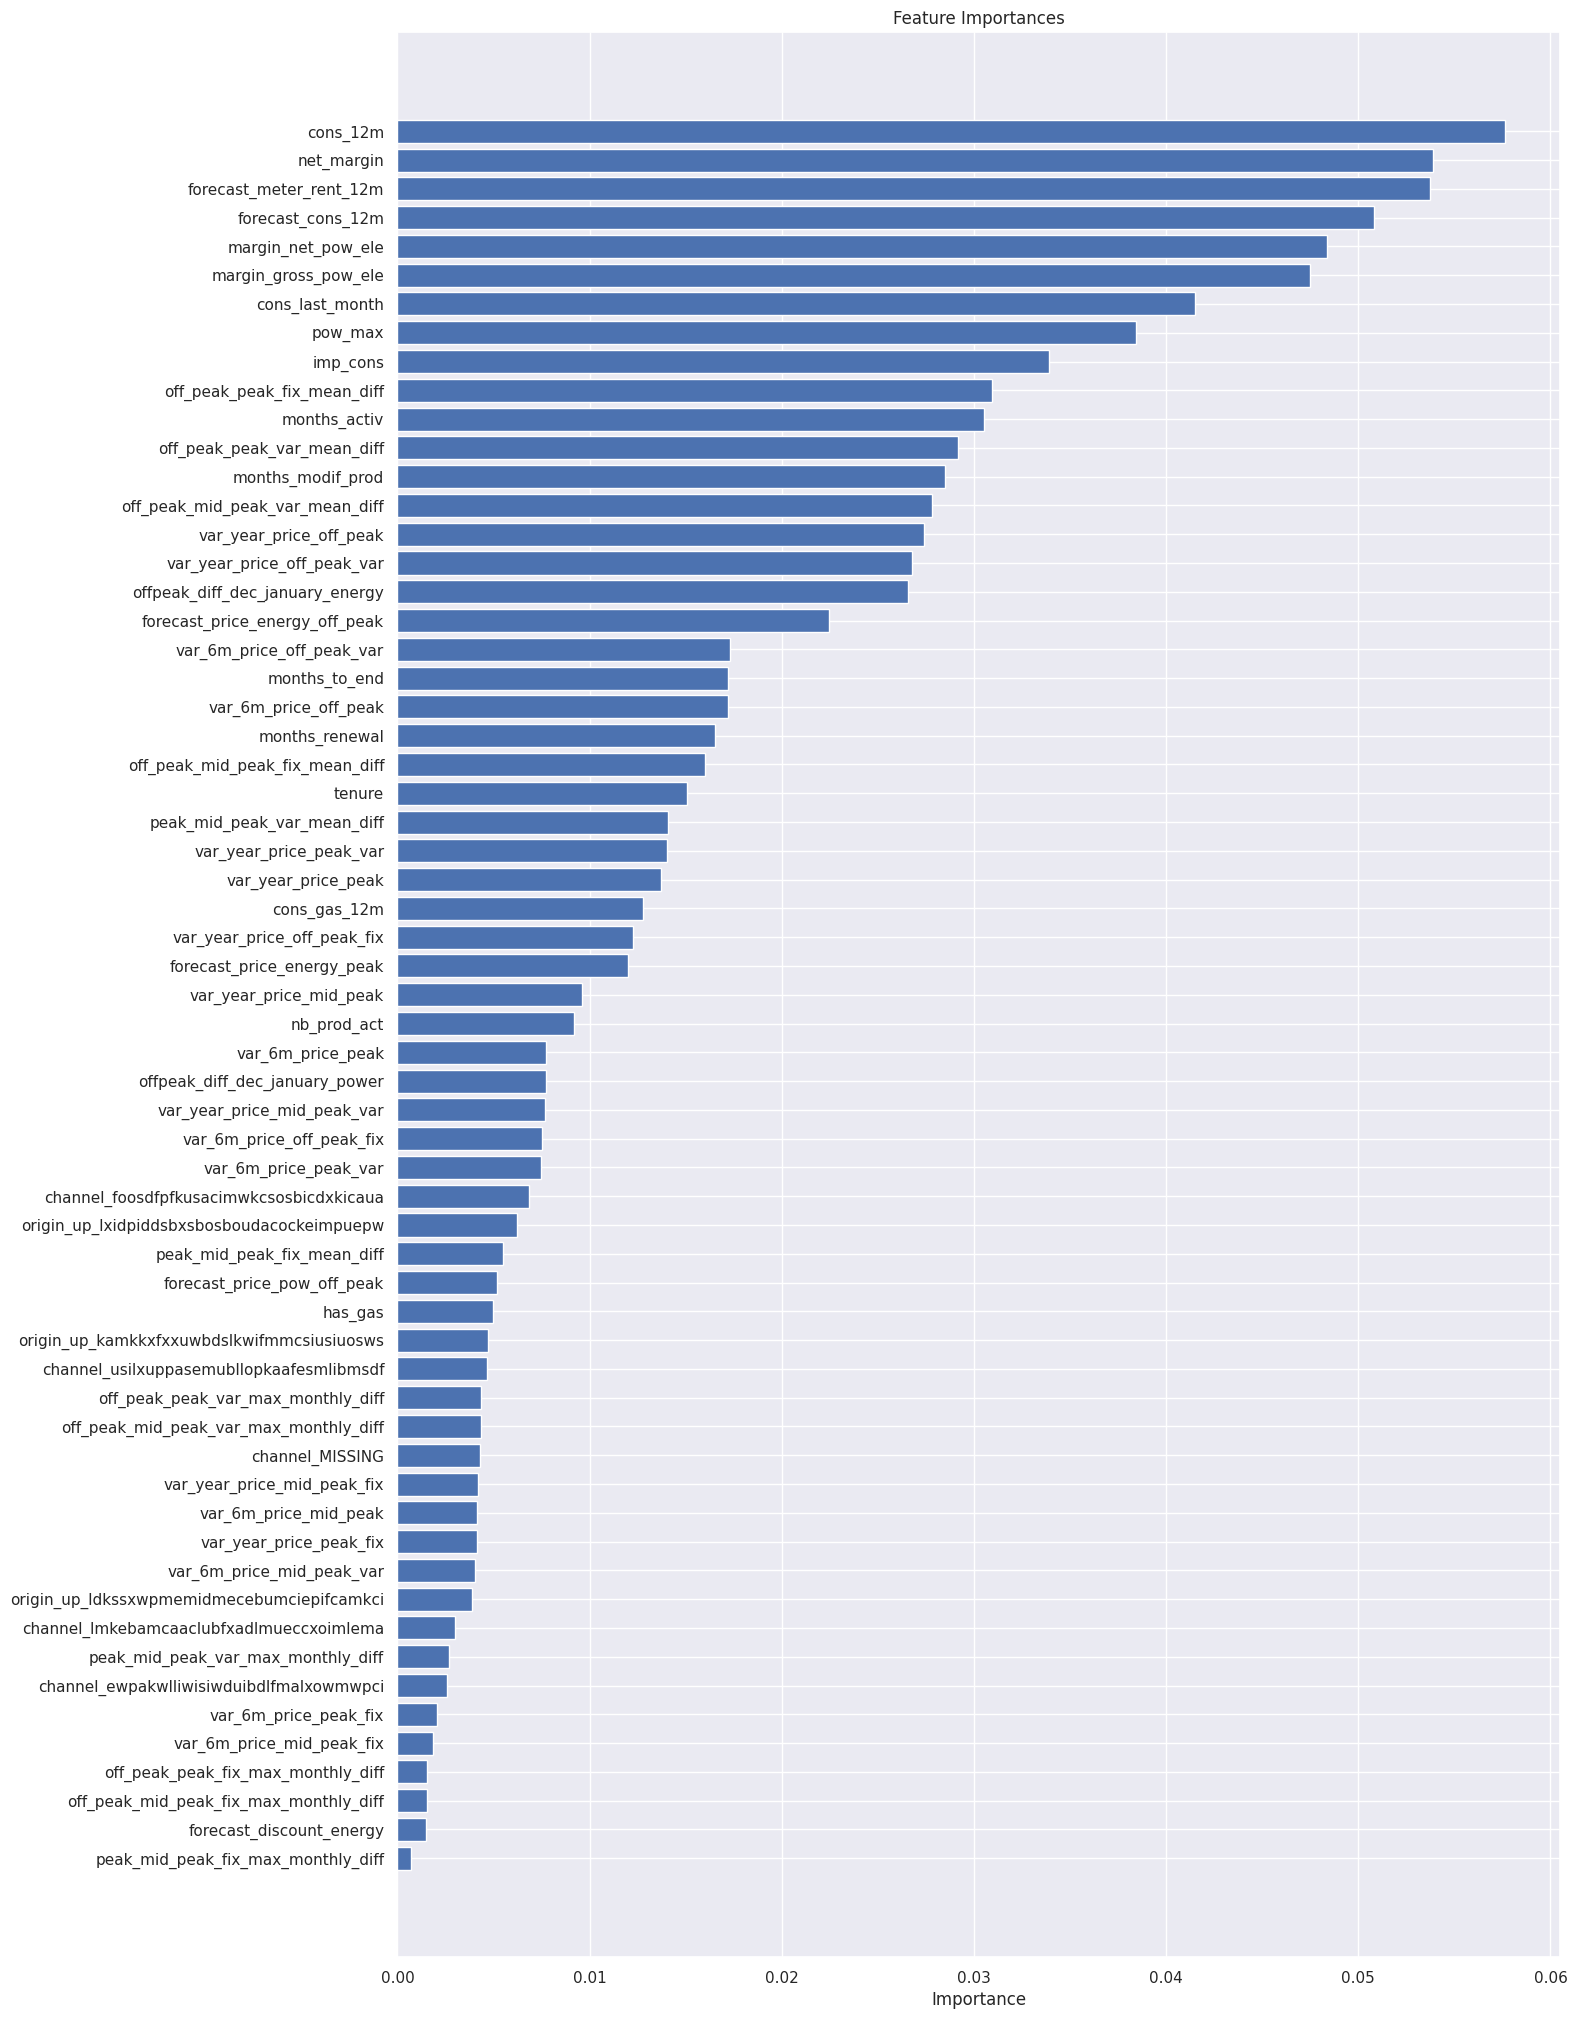

In [47]:
#Plotting the bar graph of feature importances

plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')

plt.show()

#Results

* Net margin and 12-month consumption are key indicators of churn in the model.
* Power subscription margin significantly influences churn predictions.
* Duration metrics like months active, contract tenure, and time since contract modification are important for churn forecasting.
* A feature suggested by a colleague ranks in the upper half for influence, with some derivative features performing even better.
* Price sensitivity factors are present but are not primary indicators of customer churn.


The last bullet point answers our question:  Is churn driven by the customers' price sensitivity?

Given the bar graph of feature importances, it looks like it is a weak contributor. However, we will need additional experimentation to arrive at a more concrete result.

